<a href="https://colab.research.google.com/github/SeungbeomDo/Time_Series_Analysis/blob/main/VAR_interest_rate_and_CPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 및 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DSL/TSA/all.xlsx')
data['Date'] = pd.to_datetime(data['Date'])
data.iloc[:, 1:] = np.log(data.iloc[:,1:]/data.iloc[:,1:].shift(1))
data = data.dropna()
data

,Date,Call,CD,Treasury,Mortgage,HPI,CPI
1,2006-02-01,0.047006,0.023811,-0.010882,-0.010695,0.015267,0.001992
2,2006-03-01,0.012674,0.004695,0.000000,-0.021740,0.024939,0.005899
3,2006-04-01,0.000000,0.013954,0.008715,-0.007353,0.011429,0.000989
4,2006-05-01,-0.002522,0.006905,-0.004348,-0.001847,0.004858,0.001948
5,2006-06-01,0.051672,0.024916,0.023682,0.012856,-0.001617,-0.001948
...,...,...,...,...,...,...,...
198,2022-07-01,0.121786,0.191492,0.129387,0.029270,-0.042296,0.004794
199,2022-08-01,0.138150,0.146415,0.009756,0.044661,-0.026264,-0.001104
200,2022-09-01,0.112713,0.075898,0.095706,0.096355,-0.020311,0.002850
201,2022-10-01,0.155447,0.203686,0.091514,0.006244,-0.046951,0.002567


#콜금리 상승률 & CPI 상승률

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
def params(df, n_vars, n_lags, index_var): #n_var 차원 벡터의 VAR(n_lags) 모형에서 index_var번째 변수에 자기자신을 포함한 변수들이 미치는 영향력
  ind_var = 1 - index_var

  coef_00 = []
  for i in np.arange(1, n_vars * n_lags + 1, 2):
    coef_00.append(df.iloc[i, index_var])
  coef_01 = []
  for i in np.arange(2, n_vars * n_lags + 1, 2):
    coef_01.append(df.iloc[i, index_var])
  
  plt.figure(figsize = (11,6))

  plt.subplot(1,2,1)
  plt.axhline(0, linestyle = '--', color = 'black')
  plt.title('coefficients of {0} for {1}'.format(df.columns[ind_var], df.columns[index_var]))
  plt.plot(np.arange(1, n_lags+1), coef_00)

  plt.subplot(1,2,2)
  plt.axhline(0, linestyle = '--', color = 'black')
  plt.title('coefficients of {0} for {1}'.format(df.columns[ind_var], df.columns[ind_var]))
  plt.plot(np.arange(1, n_lags+1), coef_01)
  plt.show

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


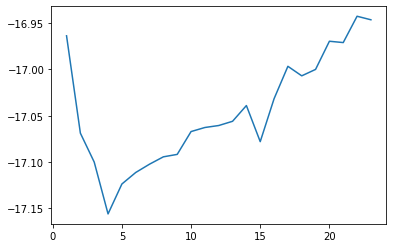

minimum AIC is -17.15591568817597, with time lag of 4
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Feb, 2023
Time:                     12:42:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.8570
Nobs:                     198.000    HQIC:                  -17.0349
Log likelihood:           1154.54    FPE:                3.54270e-08
AIC:                     -17.1559    Det(Omega_mle):     3.24134e-08
--------------------------------------------------------------------
Results for equation Call
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.014461         0.006471           -2.235           0.025
L1.Call         0.314968         0.072322            4.355           0.000
L1.CPI          2.091546       

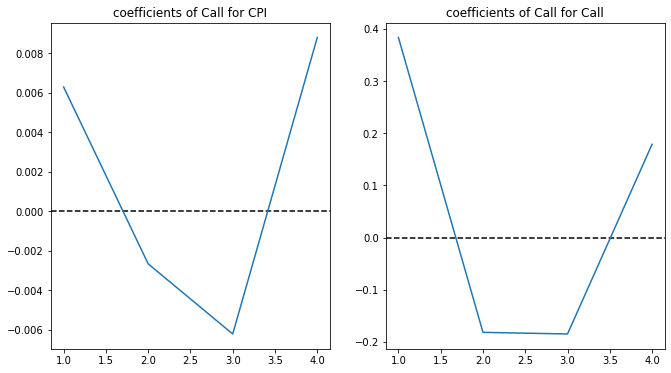

In [ ]:
forecasting_model = VAR(data.iloc[:, [1,6]])
results_aic = []
for p in range(1,24):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)

plt.plot(range(1,24), results_aic)
plt.show()
print('minimum AIC is {0}, with time lag of {1}'.format(np.min(results_aic), np.argmin(results_aic)+1))

print(forecasting_model.fit(np.argmin(results_aic)+1).summary())
print(params(forecasting_model.fit(np.argmin(results_aic)+1).params, 2, np.argmin(results_aic)+1, 1))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


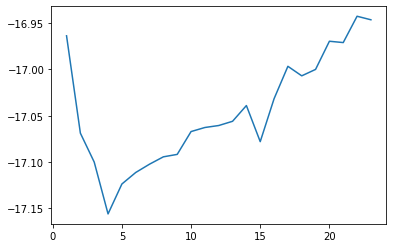

minimum AIC is -17.15591568817597, with time lag of 4
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Feb, 2023
Time:                     12:42:21
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.8570
Nobs:                     198.000    HQIC:                  -17.0349
Log likelihood:           1154.54    FPE:                3.54270e-08
AIC:                     -17.1559    Det(Omega_mle):     3.24134e-08
--------------------------------------------------------------------
Results for equation Call
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.014461         0.006471           -2.235           0.025
L1.Call         0.314968         0.072322            4.355           0.000
L1.CPI          2.091546       

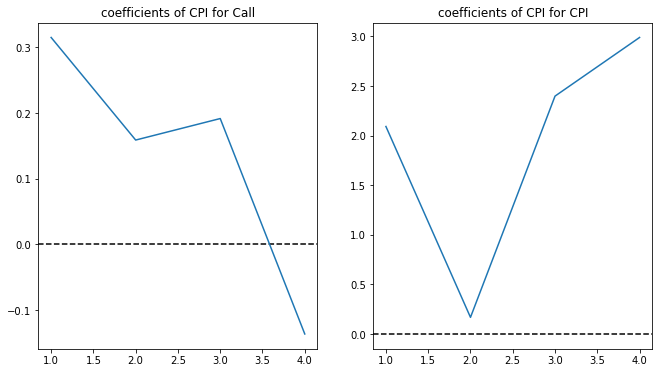

In [ ]:
forecasting_model = VAR(data.iloc[:, [1,6]])
results_aic = []
for p in range(1,24):
  results = forecasting_model.fit(p, method = 'MLE')
  results_aic.append(results.aic)

plt.plot(range(1,24), results_aic)
plt.show()
print('minimum AIC is {0}, with time lag of {1}'.format(np.min(results_aic), np.argmin(results_aic)+1))

print(forecasting_model.fit(np.argmin(results_aic)+1, method = 'MLE').summary())
print(params(forecasting_model.fit(np.argmin(results_aic)+1).params, 2, np.argmin(results_aic)+1, 0))

In [ ]:
forecast_model_fit = forecasting_model.fit(np.argmin(results_aic)+1)

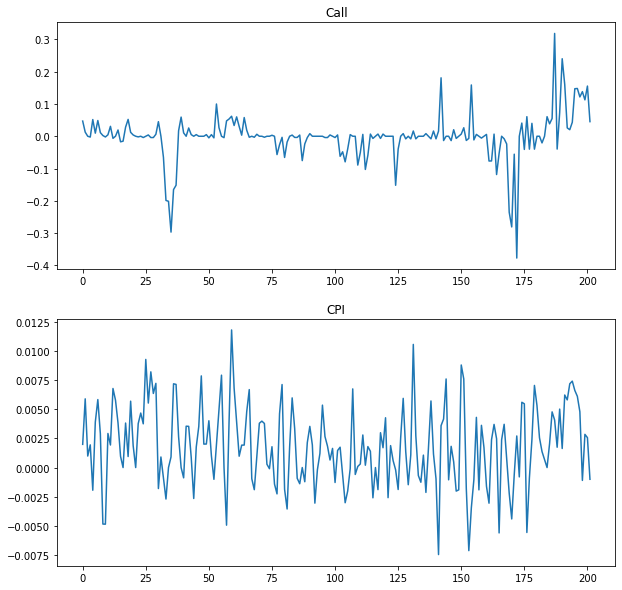

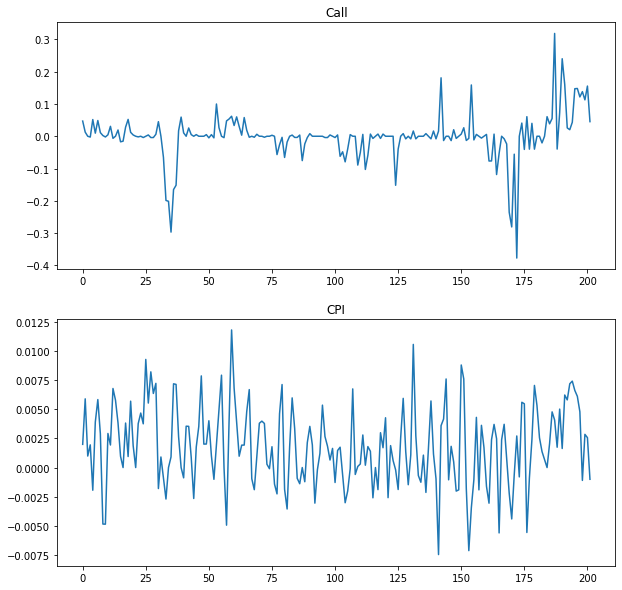

In [ ]:
forecast_model_fit.plot()

In [ ]:
from statsmodels.tsa.vector_ar.hypothesis_test_results import WhitenessTestResults

In [ ]:
forecast_model_fit.test_whiteness(10, 0.05, False).summary()

Test statistic,Critical value,p-value,df
23.30,36.42,0.502,24


In [ ]:
forecast_model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Feb, 2023
Time:                     12:42:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.8570
Nobs:                     198.000    HQIC:                  -17.0349
Log likelihood:           1154.54    FPE:                3.54270e-08
AIC:                     -17.1559    Det(Omega_mle):     3.24134e-08
--------------------------------------------------------------------
Results for equation Call
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.014461         0.006471           -2.235           0.025
L1.Call         0.314968         0.072322            4.355           0.000
L1.CPI          2.091546         1.433907            1.459           0.145
L2.Call   

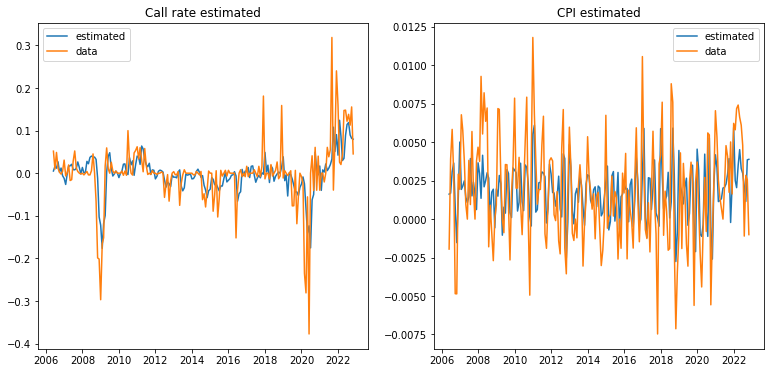

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
plt.title('Call rate estimated')
plt.plot(data['Date'][4:], forecast_model_fit.fittedvalues['Call'], label = 'estimated')
plt.plot(data['Date'][4:], data['Call'][4:], label = 'data')
plt.legend()
plt.subplot(1,2,2)
plt.title('CPI estimated')
plt.plot(data['Date'][4:], forecast_model_fit.fittedvalues['CPI'], label = 'estimated')
plt.plot(data['Date'][4:], data['CPI'][4:], label = 'data')
plt.legend()

#그래인저 인과관계

In [ ]:
forecast_model_fit.test_causality('Call', 'CPI', kind='f').summary()

Test statistic,Critical value,p-value,df
2.672,2.396,0.032,"(4, 378)"


In [ ]:
forecast_model_fit.test_causality('CPI', 'Call', kind='f').summary()

Test statistic,Critical value,p-value,df
2.736,2.396,0.029,"(4, 378)"


#충격반응모형

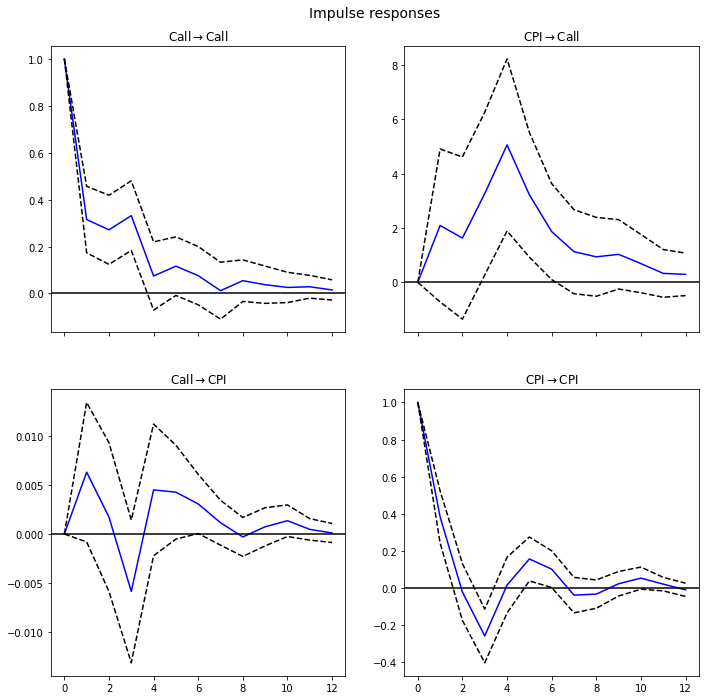

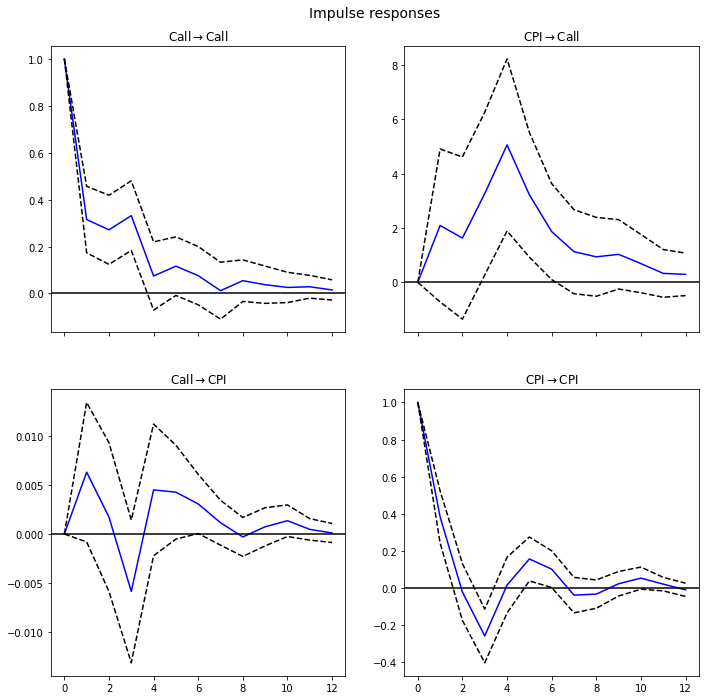

In [ ]:
irf = forecast_model_fit.irf(12)
irf.plot()